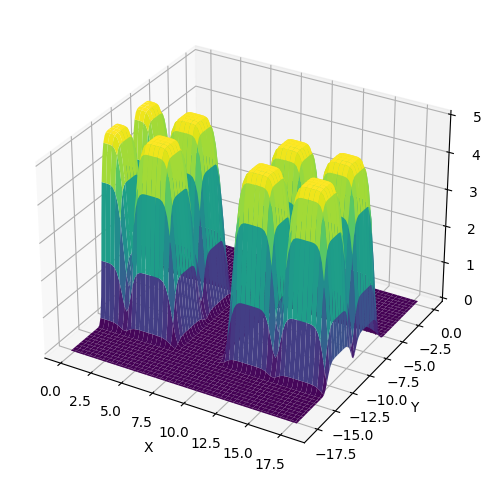

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, xc, yc, p=10, s=1, a=1):
    return a*np.exp(-((x-xc)**p + (y-yc)**p)/((2.0*s)**p))

# Creazione della griglia di punti
x = np.linspace(0, 18, 100)
y = np.linspace(0, -18, 100)
x, y = np.meshgrid(x, y)
pp = 6
ss = 0.9
aa=5
z = f(x, y, 12, -12, p=pp, s=ss, a=aa)
z += f(x, y, 16, -12, p=pp, s=ss, a=aa)
z += f(x, y, 4, -12, p=pp, s=ss, a=aa)
z += f(x, y, 0, -12, p=pp, s=ss, a=aa)
z += f(x, y, 12, -8, p=pp, s=ss, a=aa)
z += f(x, y, 16, -8, p=pp, s=ss, a=aa)
z += f(x, y, 4, -8, p=pp, s=ss, a=aa)
z += f(x, y, 0, -8, p=pp, s=ss, a=aa)

# z = f(x, y, 10, -10, p=pp, s=ss, a=aa)
# z += f(x, y, 15, -10, p=pp, s=ss, a=aa)
# z += f(x, y, 0, -10, p=pp, s=ss, a=aa)
# z += f(x, y, 10, -5, p=pp, s=ss, a=aa)
# z += f(x, y, 15, -5, p=pp, s=ss, a=aa)
# z += f(x, y, 0, -5, p=pp, s=ss, a=aa)

# Creazione della figura
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


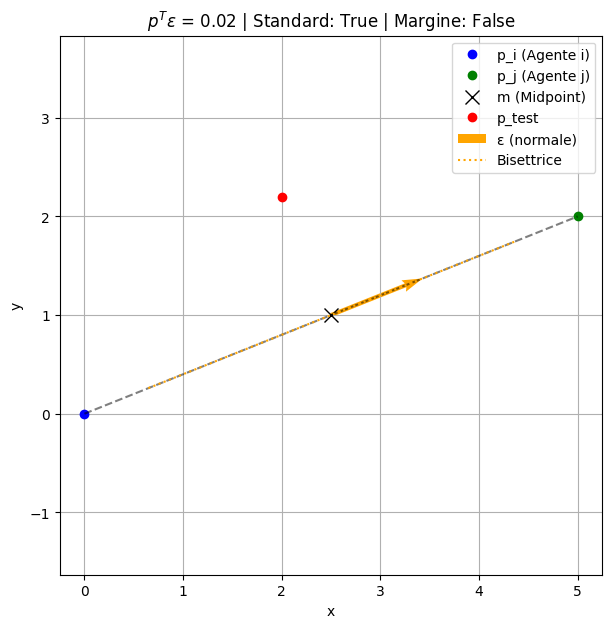

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Punti base
p_i = np.array([0.0, 0.0])
p_j = np.array([5.0,2.0])
p_test = np.array([2.0, 2.2])
delta = 0.5

# 2. Vettore tra i punti
d_ij = p_j - p_i

# 3. Punto medio (bisettrice passa di qui)
m = (p_i + p_j) / 2

# 4. Calcola epsilon
epsilon = d_ij
epsilon = epsilon / np.linalg.norm(epsilon)

# 5. Dot product
dot_product = np.dot(m-p_test, epsilon)

# 6. Controlli (se m-p_test ha lo stesso verso di d_ij allora sono nel semipiano giusto)
soddisfa_standard = dot_product >= 0
soddisfa_sicuro = dot_product >= delta

# 7. Plot
plt.figure(figsize=(7, 7))
plt.grid(True)
plt.axis('equal')

# Punti agenti
plt.plot(*p_i, 'bo', label='p_i (Agente i)')
plt.plot(*p_j, 'go', label='p_j (Agente j)')
plt.plot(*m, 'kx', label='m (Midpoint)', markersize=10)
plt.plot(*p_test, 'ro', label='p_test')

# Segmento tra i due agenti
plt.plot([p_i[0], p_j[0]], [p_i[1], p_j[1]], 'k--', alpha=0.5)

# Normale dalla bisettrice (da m)
scale = 2  # Quanto lungo il vettore
plt.quiver(m[0], m[1], epsilon[0], epsilon[1], angles='xy', scale_units='xy', scale=1, color='orange', label='ε (normale)')

# Linea della bisettrice (infinita) per visualizzazione
# Troviamo un punto a sinistra e uno a destra lungo epsilon
line_pts = np.array([m + scale * epsilon, m - scale * epsilon])
plt.plot(line_pts[:, 0], line_pts[:, 1], 'orange', linestyle=':', label='Bisettrice')

# Testo sul dot product
plt.title(f"$p^T \\epsilon$ = {dot_product:.2f} | Standard: {soddisfa_standard} | Margine: {soddisfa_sicuro}")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
